In [2]:
'''
Code by Anthony Windmon 

The purpose of this script is to demonstrate findings in the data through varying data visualiztion techiques
These techniques can be used to make evidence based conclusions and decisions.
'''

import pandas as pd

#importing salary dataset - if you're using this code, you will have to change this path
tech_salary = pd.read_csv('C:\\Users\\awindmon\\Downloads\\cleanSalaryData.csv')

#Shows first data entries
tech_salary.head(10)

,Unnamed: 0,Timestamp,Title,Location,Remote?,Org Size,Salary,Years of experience,Industry,Additional comments,Additional perks?,Categories
0,2,9/19/2020 18:50:46,senior site reliability engineer,toronto,No,501 - 1000,174000.0,21.0,Software/SaaS,NaN,"Options, hiring bonus, stock purchase plan, an...",Management or Leadership
1,4,9/19/2020 21:01:23,web developer,canberra,Yes,11- 50,97294.0,13.0,Marketing,The tech industry does exist outside of the US...,No,Software Eng
2,5,9/20/2020 8:18:17,front end software engineer,detroit,No,> 5000,97000.0,4.0,Automotive,NaN,No,Software Eng
3,8,9/19/2020 21:07:46,senior frontend developer,chicago,Yes,51 - 500,96000.0,5.0,Salesforce consultancy so clients are in many ...,NaN,10% annually,Software Eng
4,12,9/19/2020 18:13:07,senior software engineer,chicago,Yes,0 - 10,95000.0,8.0,saas forecasting,I feel like I'm always underpaid because I'm b...,~5000 bonus based on company performance,Software Eng
5,15,9/20/2020 12:37:18,mobile engineer,minneapolis,No,> 5000,93000.0,2.0,Life Insurance,NaN,7.5% annual bonus,Mobile Dev
6,16,9/19/2020 11:04:34,software engineer,des moines,No,51 - 500,92000.0,9.0,Financial Services,NaN,Options vested over 4 years. No bonuses,Software Eng
7,17,9/20/2020 2:31:19,software engineer iii,lincoln,No,501 - 1000,92500.0,10.0,E-commerce,NaN,No,Software Eng
8,26,9/19/2020 11:24:59,tech lead,london,No,51 - 500,90000.0,15.0,Banking,NaN,Stocks,Management or Leadership
9,27,9/19/2020 19:38:20,software engineer,nyc,Yes,51 - 500,90000.0,1.0,Retail Furniture,NaN,NaN,Software Eng


In [3]:
#The amount of entries per category 
from collections import Counter 
job_cats = Counter(tech_salary['Categories'])
print(job_cats)

Counter({'Software Eng': 904, 'Management or Leadership': 546, 'Business': 118, 'Data': 92, 'General Engineering': 87, 'Other': 52, 'UX and Design': 42, 'Mobile Dev': 41, 'Front End': 21, 'Sales': 12, 'Full Stack': 12, 'QA and Testing': 11, 'Product': 7, 'Entry Level Eng': 6, 'Research': 5, 'Marketing': 4, 'Medical and Wellness': 3, 'Support': 3, 'Back End': 3, 'Entrepreneurship': 2, 'Transportation': 2, 'Network and Security Engineering': 1, 'Civil Engineering': 1, 'Mathematics or Stats': 1})


In [5]:
#Top 10 Jobs in tech
jobs_top_ten = tech_salary['Categories'].value_counts()[:10].index
print('The Top 10 Jobs in Tech: \n',jobs_top_ten)

The Top 10 Jobs in Tech: 
 Index(['Software Eng', 'Management or Leadership', 'Business', 'Data',
       'General Engineering', 'Other', 'UX and Design', 'Mobile Dev',
       'Front End', 'Sales'],
      dtype='object')


In [7]:
#Top 15 cities that are represented in the data
cities_top_ten = tech_salary['Location'].value_counts()[:15].index
print('The Top 15 Cities: \n',cities_top_ten)

The Top 15 Cities: 
 Index(['nyc', 'san francisco', 'seattle', 'dc', 'boston', 'london', 'atl',
       'los angeles', 'austin', 'chicago', 'toronto', 'denver', 'minneapolis',
       'portland', 'philadelphia'],
      dtype='object')


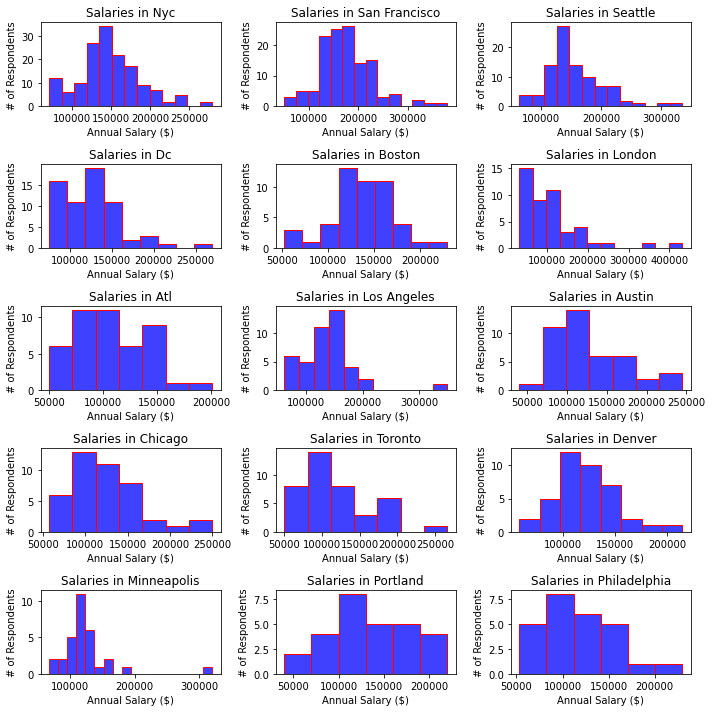

In [43]:
#How the pay differs in the top 15 cities 
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import seaborn as sbn

fig, ax = pyplot.subplots(5,3,figsize=(10,10))
for i, figure in enumerate(ax.flat):
    plot = sbn.histplot(tech_salary[tech_salary['Location'] == cities_top_ten[i]]['Salary'], ax=figure, kde=False, 
                        color='b',edgecolor='red')
    plot.set(title=f'Salaries in {cities_top_ten[i].title()}', xlabel='Annual Salary ($)',
            ylabel='# of Respondents')
    plt.tight_layout() #Prevents text overlapping 

#Used to center all of graphs -- I find centered graphs to be more visually pleasing!
    from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

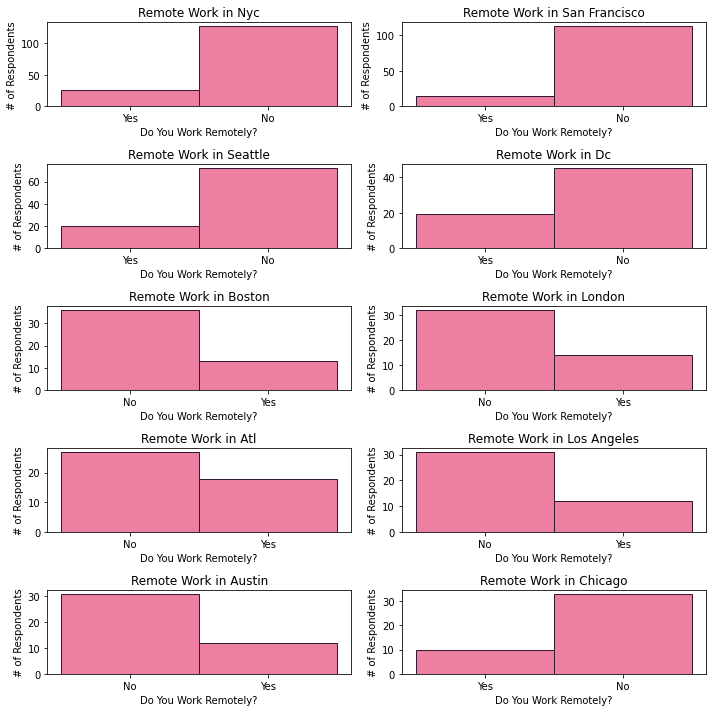

In [15]:
#The objective is to see if there is a correlation between salary and remote work status
fig, ax = pyplot.subplots(5,2,figsize=(10,10))
for i, figure in enumerate(ax.flat):
    plot = sbn.histplot(tech_salary[tech_salary['Location'] == cities_top_ten[i]]['Remote?'], ax=figure, kde=False,
                       color='#e75480',edgecolor='#301934')
    plot.set(title=f'Remote Work in {cities_top_ten[i].title()}', xlabel='Do You Work Remotely?',
            ylabel='# of Respondents')
    plt.tight_layout() #Prevents text overlapping 

Counter({'No': 1334, 'Yes': 642})


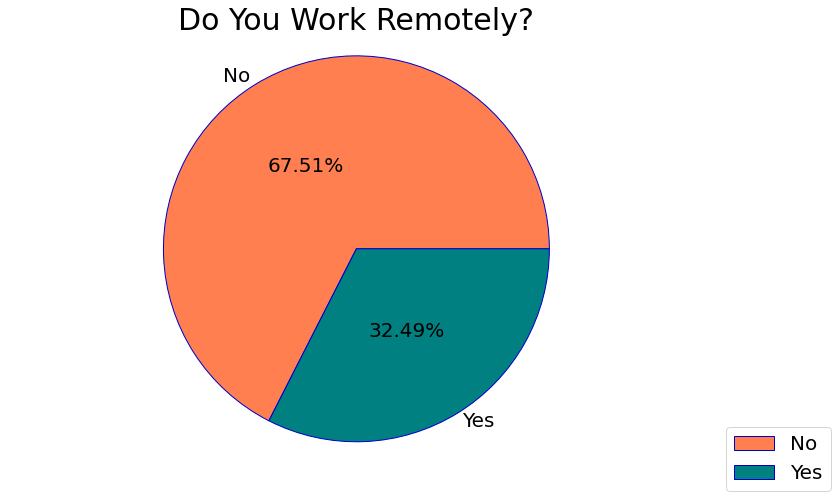

In [20]:
#Prints the number of entries regarding remote work

remote_ans = Counter(tech_salary['Remote?'])
print(remote_ans)

#Crear
remote_ent = list(remote_ans.keys())
remote_amt = list(remote_ans.values())

#add colors
colors = ['#FF7F50','#008080']

fig, ax = plt.subplots(figsize=(10,7))
pie_chart = ax.pie(remote_amt,labels=remote_ent, autopct='%.2f%%', 
                   textprops={'fontsize':20
                             },labeldistance=1.05, colors=colors,
                  pctdistance=0.5)
#Makes the separating line between categories appear as white
for chart in pie_chart[0]:
    chart.set_edgecolor('#0000CD')
    
plt.tight_layout() #Prevents text overlapping -- didn't really work for this data
plt.suptitle('Do You Work Remotely?',fontsize=30)

#Creating legend
ax2 = fig.add_subplot(212)
ax2.axis('off')
ax2.legend(pie_chart[0],remote_ent, bbox_to_anchor=(1,0), loc="lower left", 
                          bbox_transform=plt.gcf().transFigure, fontsize=20)

Text(0.5, 0.98, 'Do You Work Remotely?')

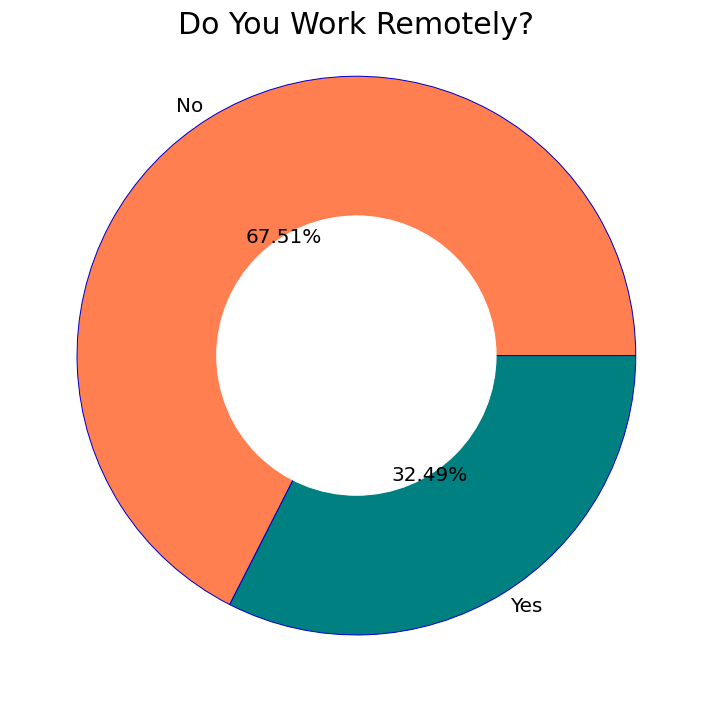

In [21]:
#Donut Chart -- an alternative method to the traditional pie chart
custom_colors = ['yellowgreen', 'tomato']
fig, ax =plt.subplots(figsize=(10,10))
donut_chart = ax.pie(remote_amt,labels=remote_ent, autopct='%.2f%%', 
                   textprops={'fontsize':20
                             },labeldistance=1.05, colors=colors,
                  pctdistance=0.5)

#Makes the separating line between categories appear as white
for chart in donut_chart[0]:
    chart.set_edgecolor('#0000CD')

donut_chart = plt.Circle((0,0), 0.5, color='white')
fig=plt.gcf()
fig.gca().add_artist(donut_chart)

plt.tight_layout() #Prevents text overlapping 
plt.suptitle('Do You Work Remotely?',fontsize=30)

In [24]:
#Printing top 12 categorized job titles represented in the data
titles_top_ten = tech_salary['Categories'].value_counts()[:12].index
print('Top 12 Categorized Job Titles: \n',titles_top_ten)

Top 12 Categorized Job Titles: 
 Index(['Software Eng', 'Management or Leadership', 'Business', 'Data',
       'General Engineering', 'Other', 'UX and Design', 'Mobile Dev',
       'Front End', 'Sales', 'Full Stack', 'QA and Testing'],
      dtype='object')


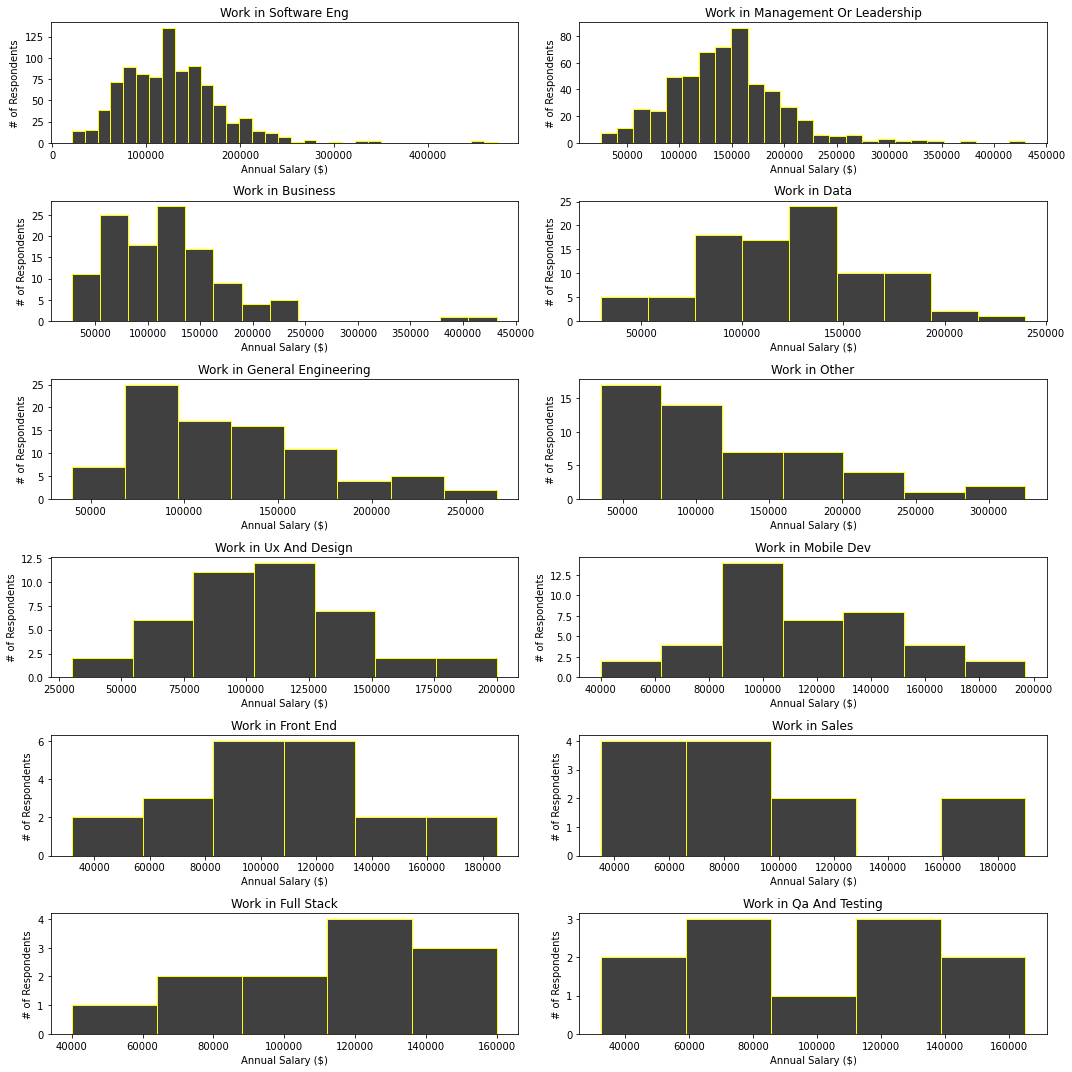

In [25]:
#Correlation between job titles and salary (keep in mind that the titles have been categorized)
fig, ax = pyplot.subplots(6,2,figsize=(15,15))
for i, figure in enumerate(ax.flat):
    plot = sbn.histplot(tech_salary[tech_salary['Categories'] == titles_top_ten[i]]['Salary'], ax=figure, kde=False,
                       color='black',edgecolor='yellow')
    plot.set(title=f'Work in {titles_top_ten[i].title()}', xlabel='Annual Salary ($)',
            ylabel='# of Respondents')
    plt.tight_layout() #Prevents text overlapping 

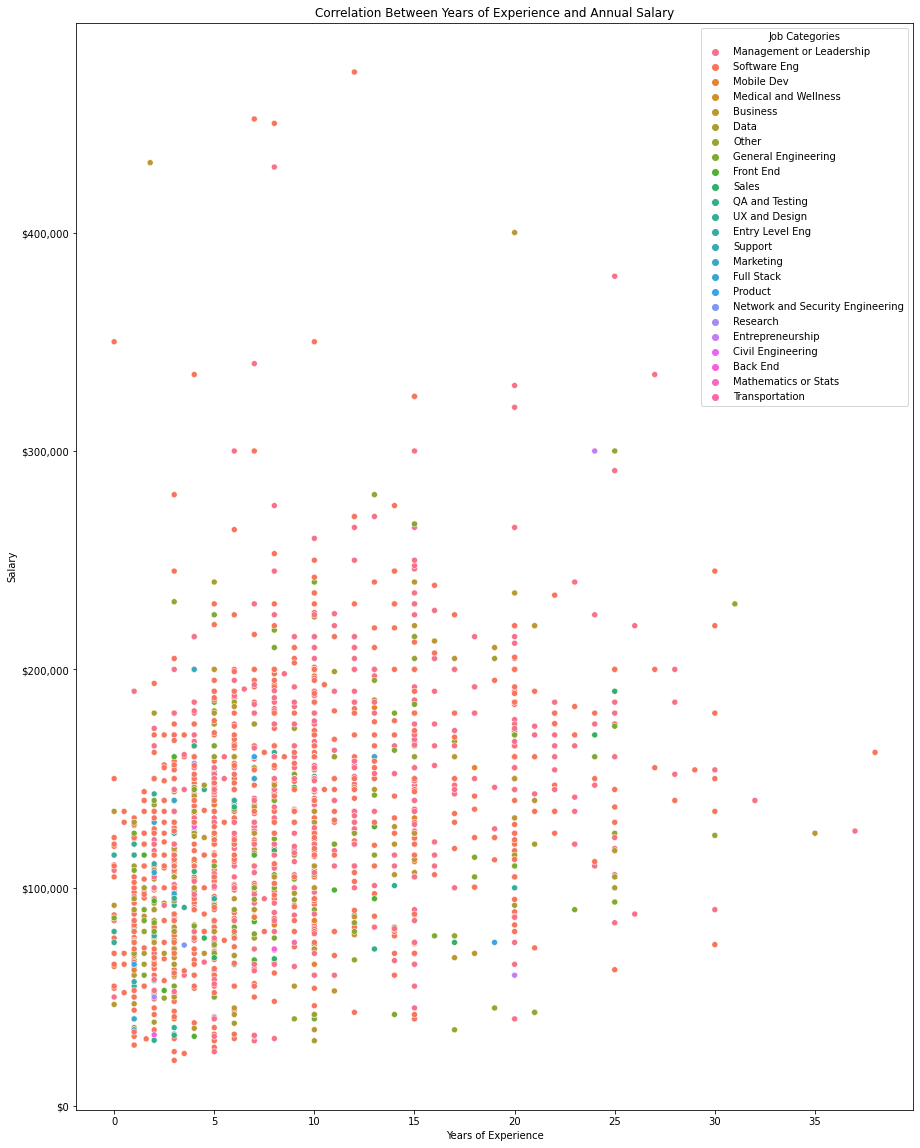

In [26]:
#The Correlation between salary amount and years of experience 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

fig, ax = pyplot.subplots(figsize=(15,20))
plot = sbn.scatterplot(tech_salary['Years of experience'], tech_salary['Salary'], hue=tech_salary['Categories'])
plot.set(xlabel='Years of Experience', ylabel='Salary', title='Correlation Between Years of Experience and Annual Salary')
ax.legend(title='Job Categories')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

[Text(0, 0, 'Salaries')]

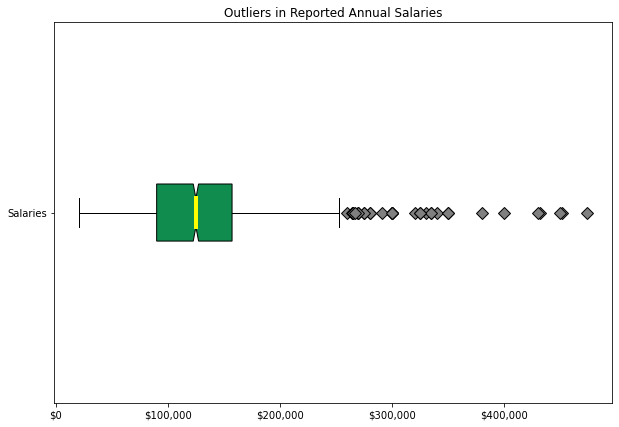

In [27]:
#Finding outliers in data 
fig, ax = pyplot.subplots(figsize=(10,7))

#changes presentation of outliers
flierprops = dict(marker='D', markerfacecolor='gray', markersize=8,
                  linestyle='none', markeredgecolor='black')
outlier_plot = ax.boxplot(tech_salary['Salary'], 
                          patch_artist=True,notch='True',vert=0,
                         flierprops=flierprops)
colors =['#118C4F'] #I decided to use a money green color for salary :)

#changes box plot color
for patch, color in zip(outlier_plot['boxes'], colors):
    patch.set_facecolor(color)

#changes median (in the boxplot) color and make the line more pronounced
for median in outlier_plot['medians']:
    median.set(color='yellow', linewidth=4)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
    
plt.title('Outliers in Reported Annual Salaries')
ax.set_yticklabels(['Salaries'])

[Text(0, 0, 'YOE')]

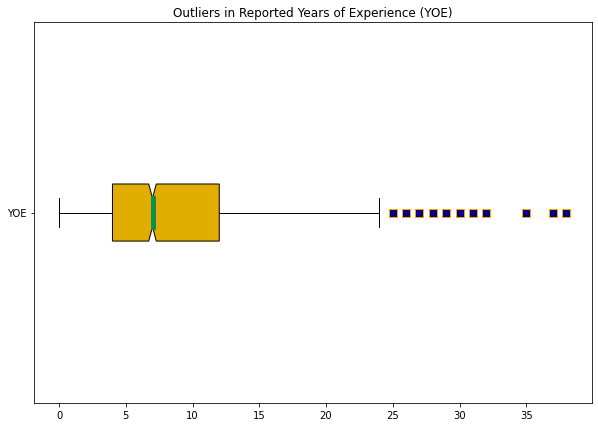

In [28]:
#Finding outliers in data 
fig, ax = pyplot.subplots(figsize=(10,7))

#changes presentation of outliers
flierprops = dict(marker='s', markerfacecolor='#000080', markersize=8,
                  linestyle='none', markeredgecolor='#FFA500')

outlier_plot = ax.boxplot(tech_salary['Years of experience'], 
                          patch_artist=True,notch='True',vert=0,
                         flierprops=flierprops)
colors =['#e1ad01'] #I decided to use a money green color for salary :)

#changes box plot color
for patch, color in zip(outlier_plot['boxes'], colors):
    patch.set_facecolor(color)

#changes median (in the boxplot) color and make the line more pronounced
for median in outlier_plot['medians']:
    median.set(color='#118C4F', linewidth=5)

plt.title('Outliers in Reported Years of Experience (YOE)')
ax.set_yticklabels(['YOE'])

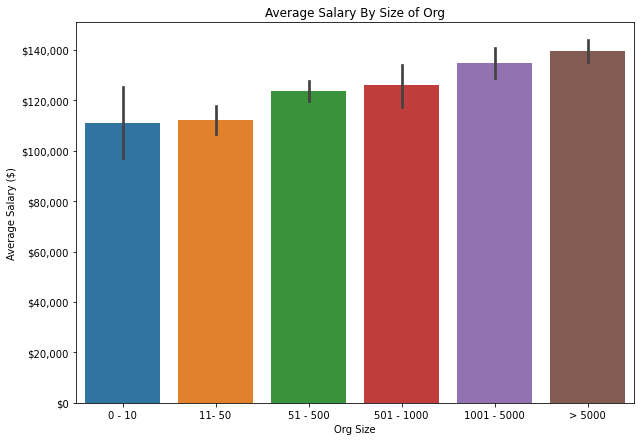

In [29]:
#Correlation between org size and salary
salary_by_org = tech_salary.groupby('Org Size').mean()['Salary']
salary_by_org = pd.DataFrame(salary_by_org).reset_index()

fig, ax = pyplot.subplots(figsize=(10,7))
plot = sbn.barplot(data=salary_by_org, x=tech_salary['Org Size'], 
                    y=tech_salary['Salary'], order=['0 - 10', '11- 50', '51 - 500',
                                                    '501 - 1000', '1001 - 5000', '> 5000'])
plot.set(title=f'Average Salary By Size of Org', xlabel='Org Size', ylabel='Average Salary ($)')
 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

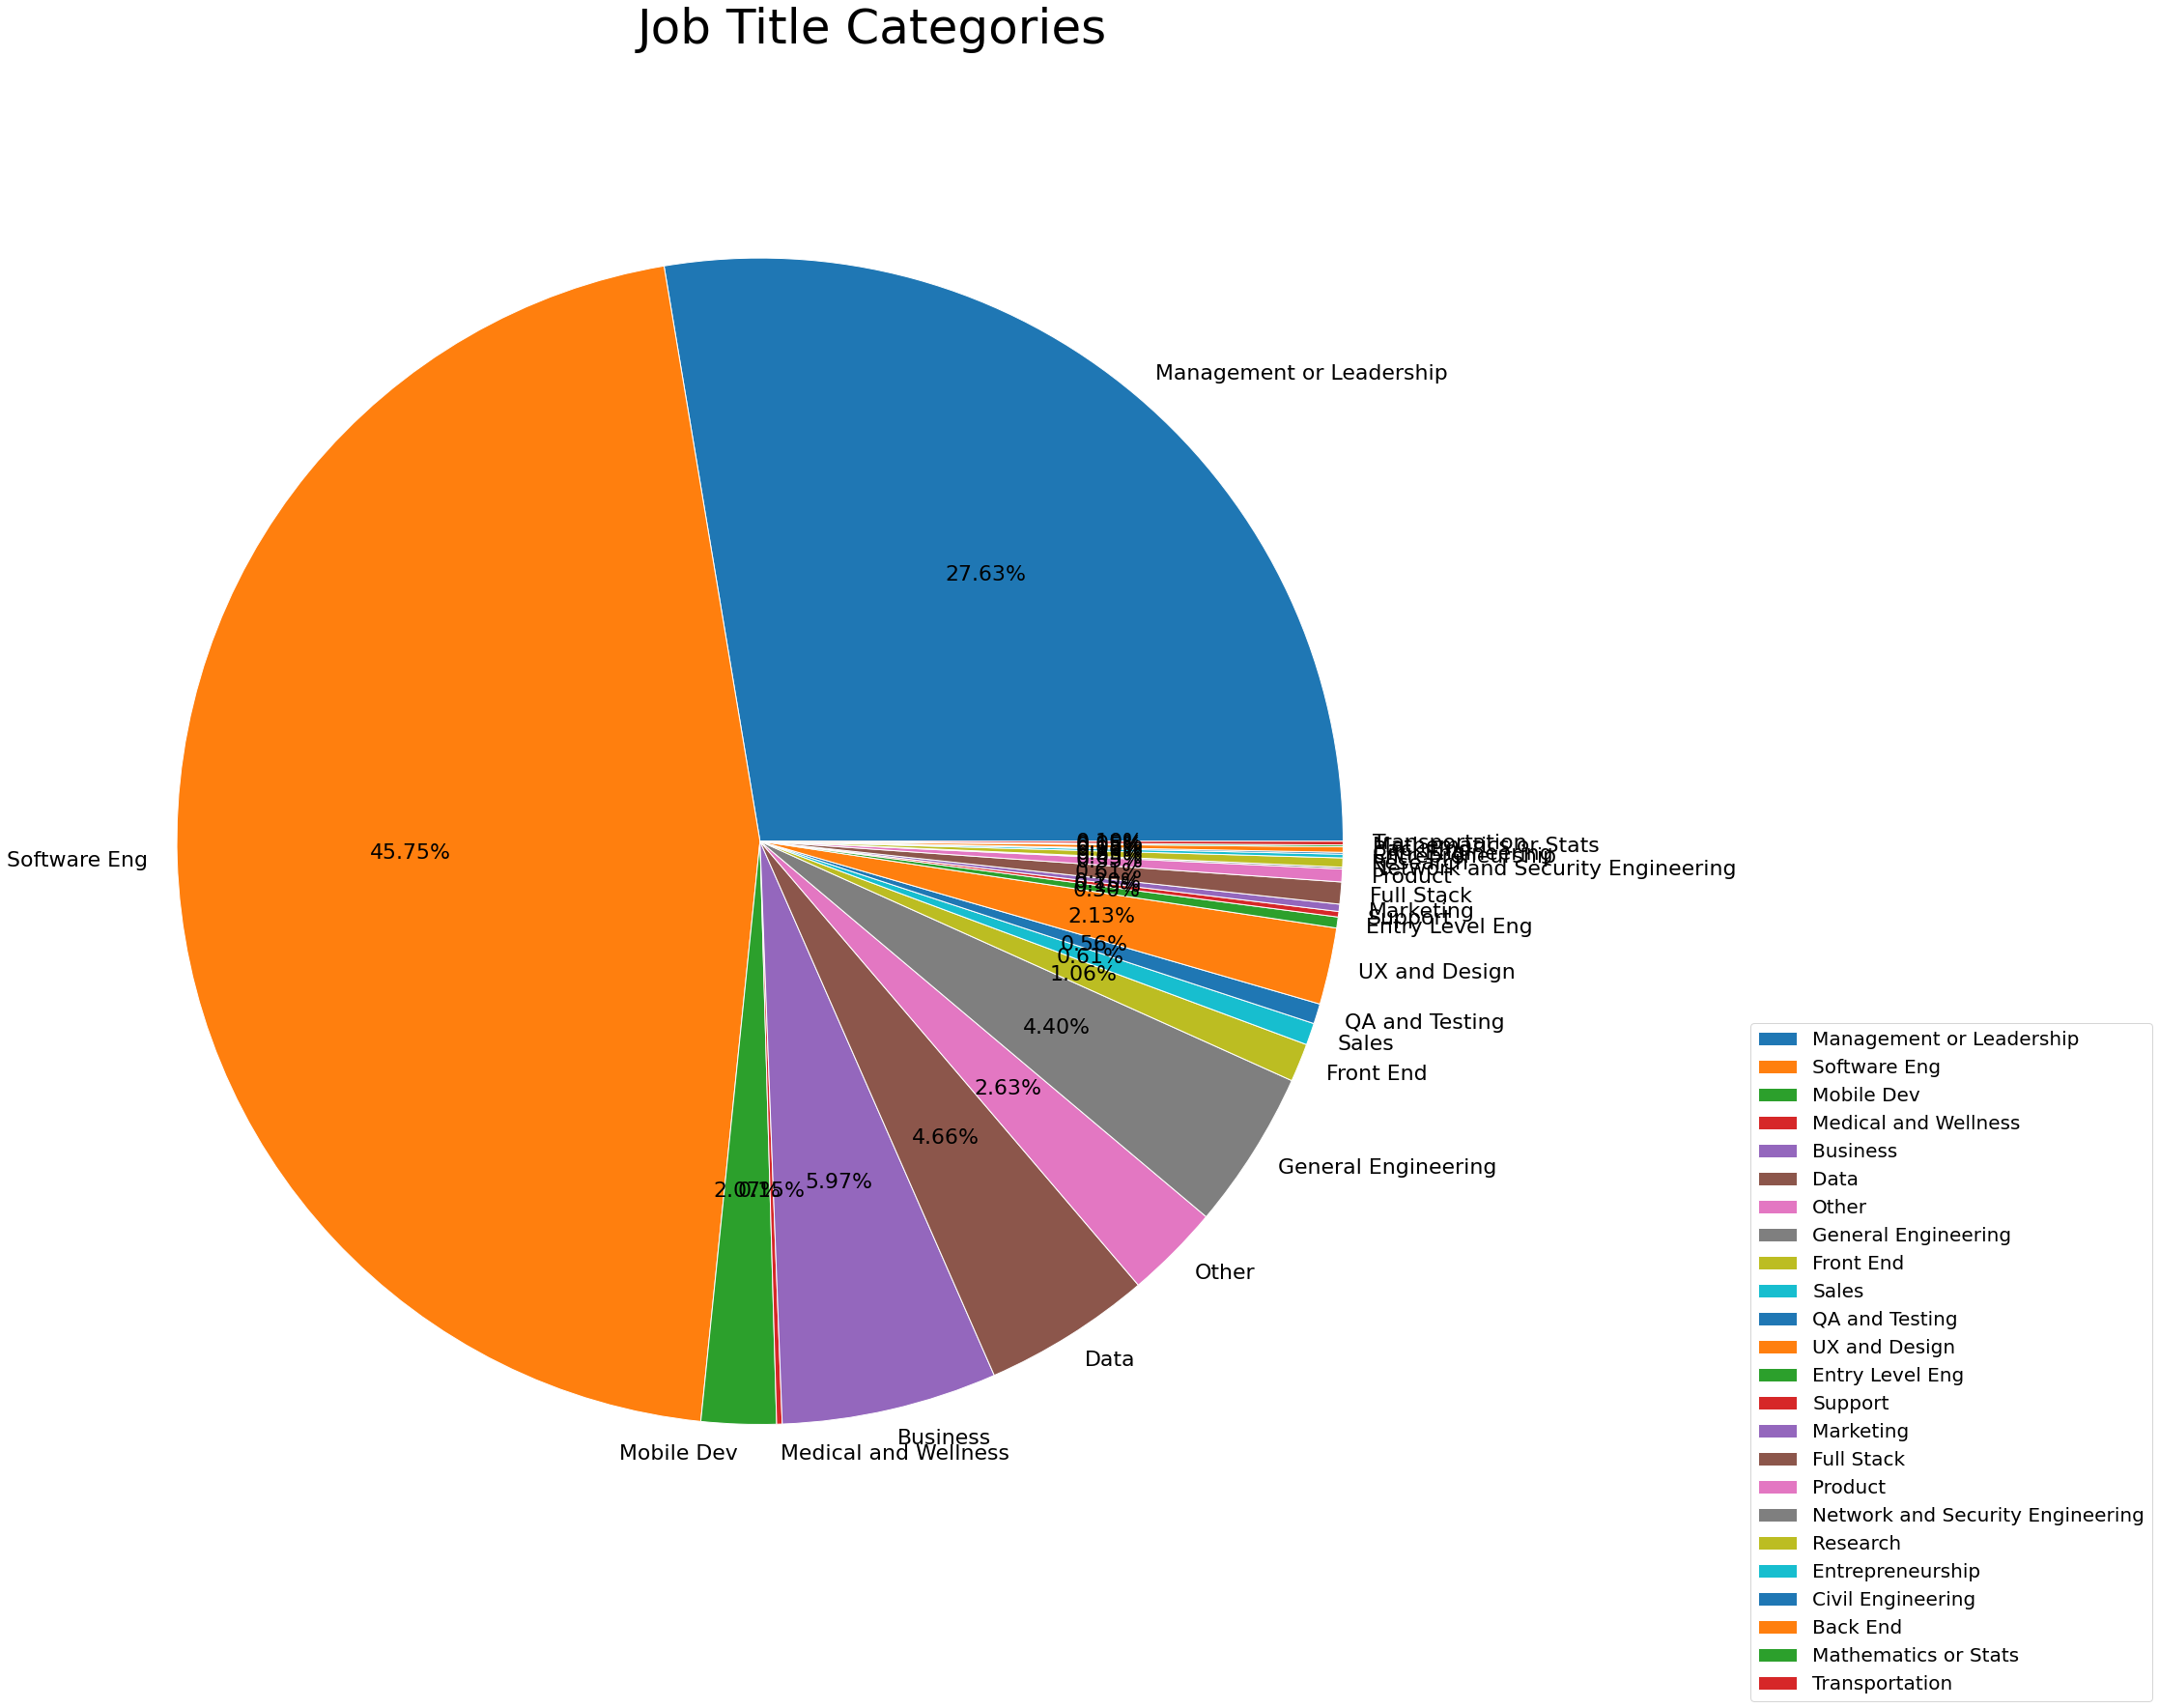

In [42]:
#Visualization of Data -- Pie Chart
#Using the counter function puts the data into a dictonary structure <key, value>; Therefore, we can extract that data

job_titles = list(job_cats.keys())
job_values = list(job_cats.values())

#Using subplot allows for options when visualizing the data
#fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(25,25)) #more concise than using the previous lines
pie_chart = ax.pie(job_values,labels=job_titles, autopct='%.2f%%', textprops={'fontsize':22},labeldistance=1.05)
#Makes the separating line between categories appear as white
for chart in pie_chart[0]:
    chart.set_edgecolor('white')
    
plt.tight_layout() #Prevents text overlapping -- didn't really work for this data
plt.suptitle('Job Title Categories',fontsize=50)

#Creating legend
ax2 = fig.add_subplot(212)
ax2.axis('off')
ax2.legend(pie_chart[0],job_titles, bbox_to_anchor=(1,0), loc="lower left", 
                          bbox_transform=plt.gcf().transFigure,
                              prop={'size': 20})

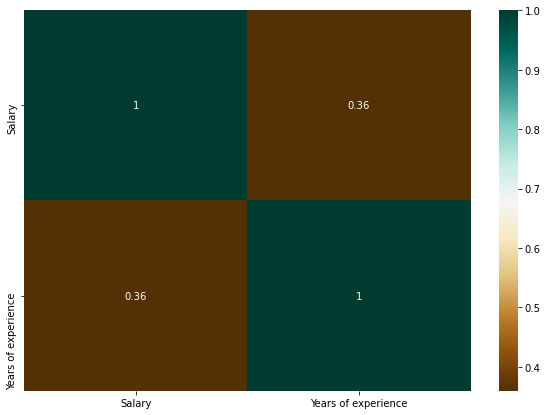

In [45]:
#Correlation between numerical features -- only works for numerical features!
del tech_salary['Unnamed: 0']
corr_tech_data = tech_salary.corr()
fig, ax = pyplot.subplots(figsize=(10,7))
sbn.heatmap(corr_tech_data, cmap='BrBG', annot=True)